In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('./local_rewards_costs.xls')
# data = data.dropna()
data.head()

,Time stamp,Actual reward,Expected reward,Actual cost: dist,Actual cost: turn,Actual cost: trav,Actual cost: real_time,Expected cost: dist,Expected cost: turn,Expected cost: trav,Actual path length,Expected path length
0,163.336,637.913940,500.650024,2.384737,1.522928,0.104301,6.340,0.403962,4.898096,0.167903,2.385458,0.458498
1,169.208,427.463104,676.340576,0.000000,0.000000,0.000000,2.152,0.000000,0.000000,0.000000,0.000000,0.000000
2,181.996,1194.491211,1387.909668,1.659543,0.462584,0.562739,4.268,0.932925,2.541783,0.111075,1.677967,0.933534
3,189.472,302.219330,244.138672,0.000000,0.000000,0.000000,3.260,0.000000,0.000000,0.000000,0.000000,0.000000
4,200.200,978.646973,865.767334,1.566076,0.300708,1.219750,3.656,0.608040,2.684804,0.145253,1.600449,0.612748


In [3]:
actual_cost = np.array(data["Actual cost: turn"])
expected_cost = np.array(data["Expected cost: turn"])
ratios = actual_cost / (expected_cost+1e-6)
ratios = ratios[ratios!=0]
ratios = ratios[ratios < 100]
turn_coef = ratios.mean()
print(f'Mean Actual / Expected turn costs ratio: {turn_coef}')

Mean Actual / Expected turn costs ratio: 0.3819708749986926


In [4]:
ratios.min(), ratios.max()

(0.003761138040767114, 2.032813806999365)

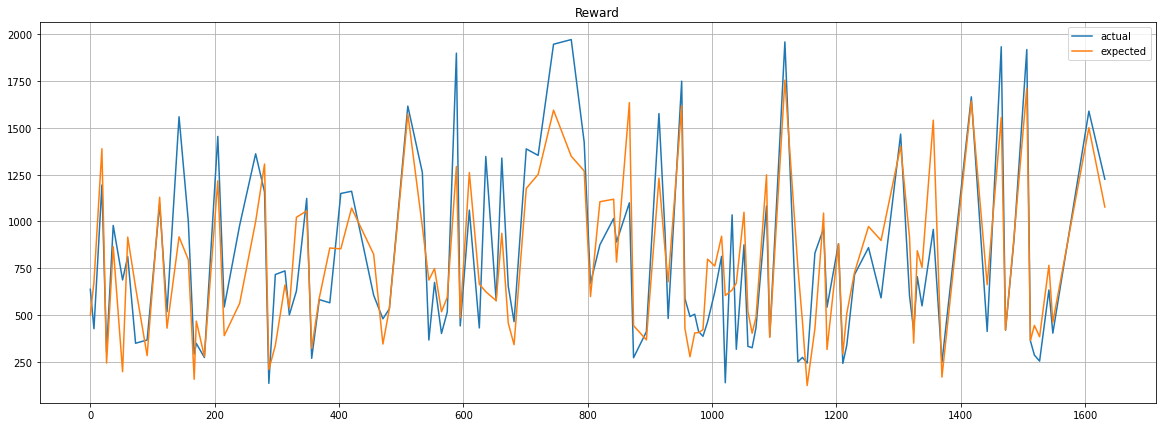

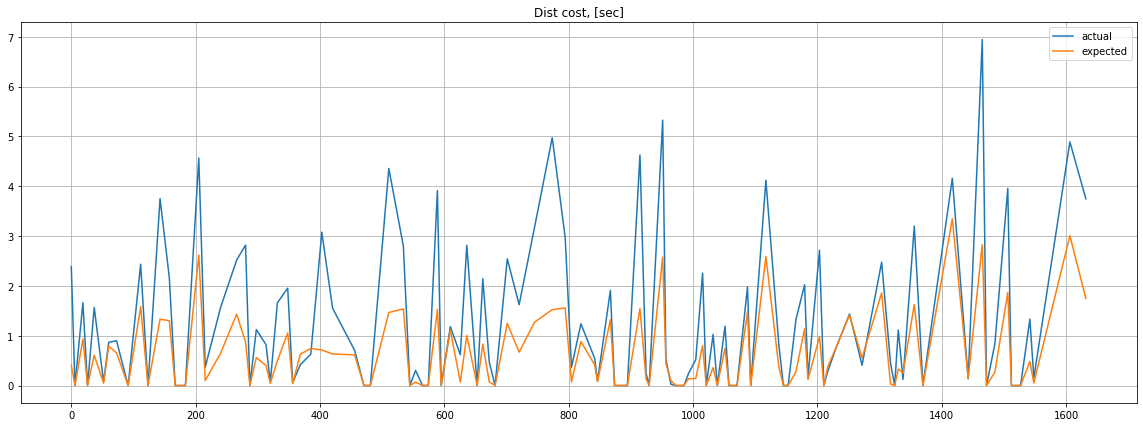

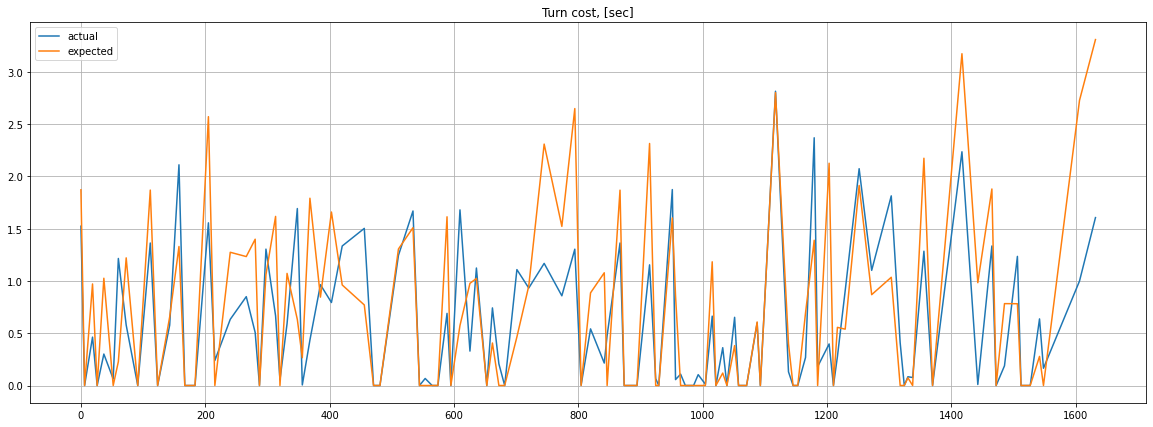

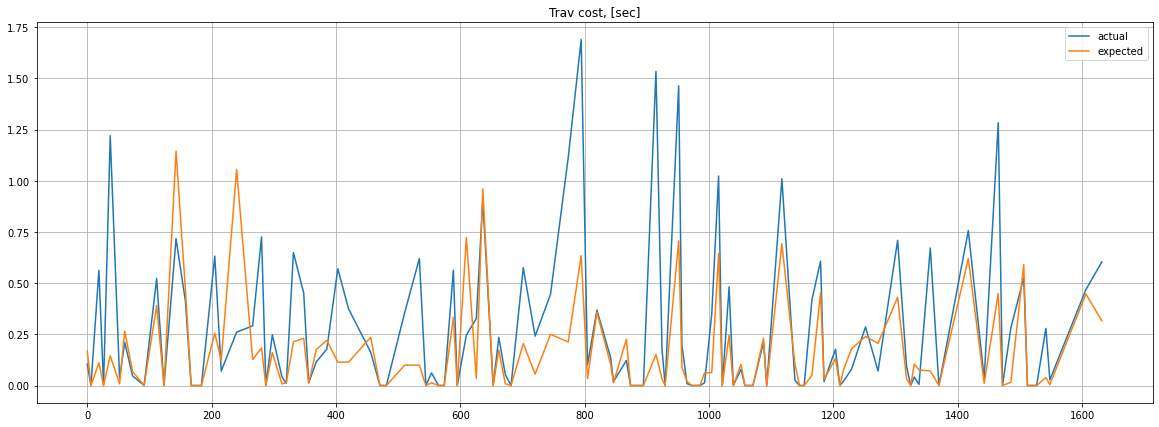

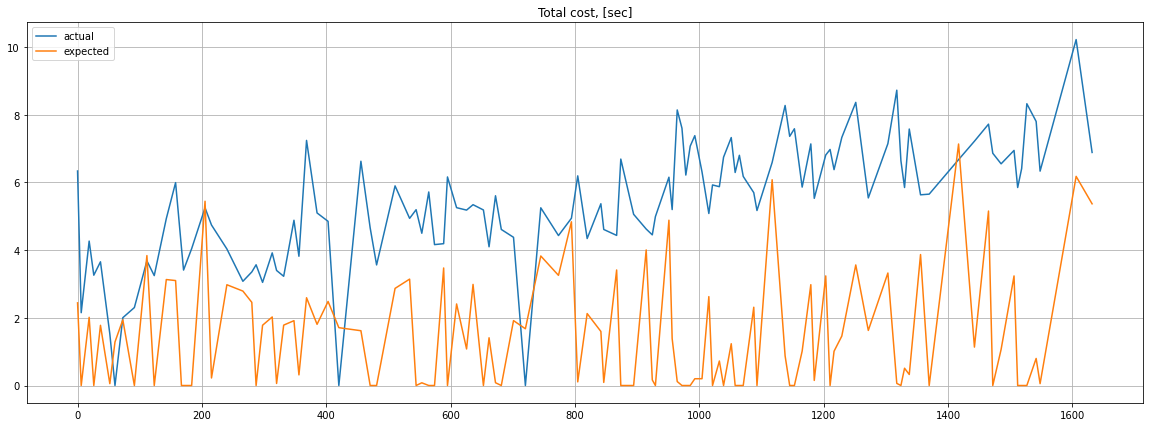

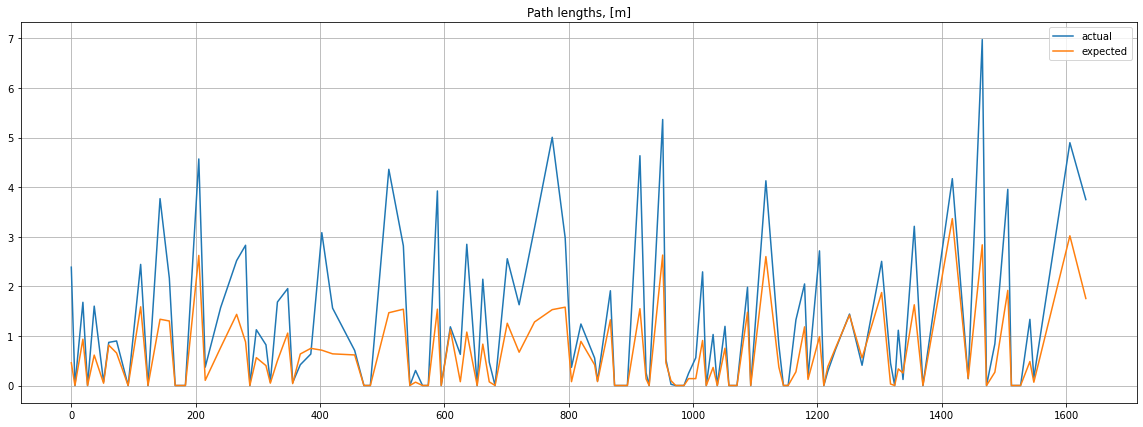

In [5]:
t = data["Time stamp"] - data["Time stamp"][0]

plt.figure(figsize=(20, 7))
plt.plot(t, data["Actual reward"], label='actual')
plt.plot(t, data["Expected reward"], label='expected')
plt.title("Reward")
plt.grid()
plt.legend()

plt.figure(figsize=(20, 7))
plt.plot(t, data["Actual cost: dist"], label='actual')
plt.plot(t, data["Expected cost: dist"], label='expected')
plt.title("Dist cost, [sec]")
plt.grid()
plt.legend()

plt.figure(figsize=(20, 7))
plt.plot(t, data["Actual cost: turn"], label='actual')
plt.plot(t, turn_coef*data["Expected cost: turn"], label='expected')
plt.title("Turn cost, [sec]")
plt.grid()
plt.legend()

plt.figure(figsize=(20, 7))
plt.plot(t, data["Actual cost: trav"], label='actual')
plt.plot(t, data["Expected cost: trav"], label='expected')
plt.title("Trav cost, [sec]")
plt.grid()
plt.legend()

plt.figure(figsize=(20, 7))
plt.plot(t, data["Actual cost: real_time"], label='actual')
total_expected_cost = data["Expected cost: dist"]+turn_coef*data["Expected cost: turn"]+data["Expected cost: trav"]
plt.plot(t, total_expected_cost, label='expected')
plt.title("Total cost, [sec]")
plt.grid()
plt.legend()

plt.figure(figsize=(20, 7))
plt.plot(t, data["Actual path length"], label='actual')
plt.plot(t, data["Expected path length"], label='expected')
plt.title("Path lengths, [m]")
plt.grid()
plt.legend();